In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #画图模块
import matplotlib.dates as mdates #日期格式处理模块
from matplotlib import style #自定义图表风格

%matplotlib inline
%config InlineBackend.figure_format='svg' #提高分辨率

from matplotlib.font_manager import FontProperties #画图自定义字体
from pylab import mpl #画图自定义字体
mpl.rcParams['font.sans-serif']=['SimHei']#指定默认字体
mpl.rcParams['font.family']='Times New Roman'#指定默认字体

In [10]:
data = pd.read_csv("D:/homework/000001.csv")
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data['Close']=pd.to_numeric(data['Close'],errors='coerce')
data['Preclose']=data['Close'].shift(1)
data['Return']=(data['Close']-data['Preclose'])/data['Preclose']
data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return
Day,,,,,,,,
1990-12-19,NaN,96.0500,99.9800,95.7900,99.9800,126000,4.940000e+05,NaN
1990-12-20,99.9800,104.3000,104.3900,99.9800,104.3900,19700,8.400000e+04,0.044109
1990-12-21,104.3900,109.0700,109.1300,103.7300,109.1300,2800,1.600000e+04,0.045407
1990-12-24,109.1300,113.5700,114.5500,109.1300,114.5500,3200,3.100000e+04,0.049666
1990-12-25,114.5500,120.0900,120.2500,114.5500,120.2500,1500,6.000000e+03,0.049760
...,...,...,...,...,...,...,...,...
2024-07-25,2901.9518,2891.8918,2897.7674,2872.8497,2886.7416,27463950000,2.730000e+11,-0.005241
2024-07-26,2886.7416,2885.9953,2899.1162,2875.3959,2890.8973,27838753600,2.750000e+11,0.001440
2024-07-29,2890.8973,2889.4726,2898.9512,2878.5825,2891.8453,25689972700,2.600000e+11,0.000328


## Month Return

In [11]:
data_new = data['1995-01-01':'2024-12-31'].copy()
Month_data=data_new.resample('ME')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
Month_data

,Return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-03-31,0.008622
2024-04-30,0.020932
2024-05-31,-0.005801


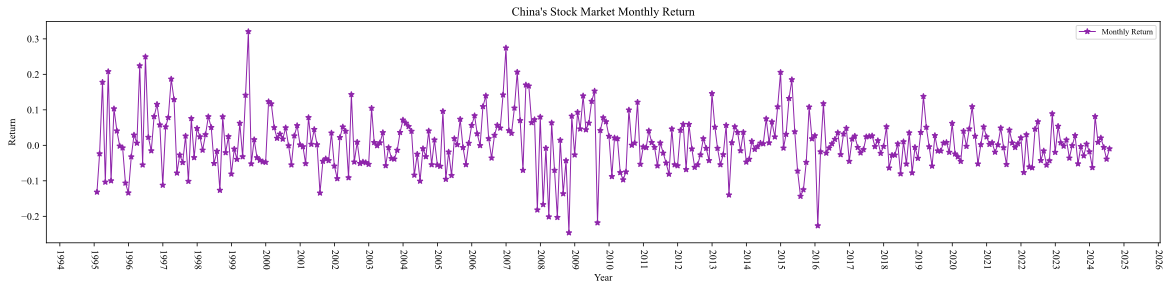

In [12]:
fig, ax=plt.subplots(figsize=(20,4))

ax.plot('Return',#图片数据
'*-',#图片类型
color='#8E24AA',#图片颜色
label='Monthly Return',#图片标签
linewidth=1,#图片线宽
data=Month_data)#图片数据来源

ax.set_title("China's Stock Market Monthly Return")
ax.set_ylabel('Return')
ax.set_xlabel('Year')
#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=270)
#添加图例
plt.legend(loc='upper right',fontsize=8)
#保存图片
fig.savefig('China_Stock_Market_Monthly_Return.pdf')
plt.show();

In [13]:
Month_data['2016':'2016']

,Return
Day,
2016-01-31,-0.226487
2016-02-29,-0.018125
2016-03-31,0.117538
2016-04-30,-0.021838
2016-05-31,-0.007385
2016-06-30,0.004454
2016-07-31,0.016975
2016-08-31,0.035629
2016-09-30,-0.026184


In [14]:
Quarter_data = data_new.resample('QE')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
Year_data=data_new.resample('YE')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
Quarter_data
Year_data

,Return
Day,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


In [15]:
Year_data['1995':'2023']['Return'].mean()

np.float64(0.12158915002289622)

In [18]:
print('中国股票市场收益率年化均值是：',Year_data['1995':'2023']['Return'].mean().round(3)*100,'%')

中国股票市场收益率年化均值是： 12.2 %


In [19]:
np.mean(Year_data['1995':'2023']['Return'])

np.float64(0.12158915002289622)

In [20]:
Month_data['1995':'2023']['Return'].mean()

np.float64(0.007252426534630863)

In [21]:
Quarter_data['1995':'2023']['Return'].mean()

np.float64(0.0238174122505223)